In [1]:
import os
os.getcwd()

'C:\\Users\\dasar\\Desktop\\Selva_Git_repo\\Data_Science\\Machine_Learning\\Class Projects\\Decision_Tree(CART algorithm)'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

## Preprocessing

### 1. Handling missing data

In [5]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# age is an int value so fill the values with mean or median
# Check how much data is missing
714/891

0.8013468013468014

<AxesSubplot:xlabel='age'>

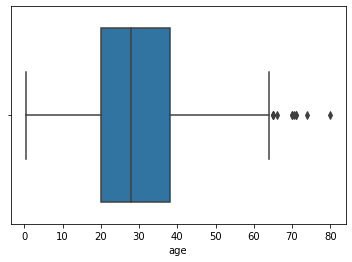

In [8]:
sns.boxplot(x= 'age',data=df)

In [9]:
# from the above boxplot, it is clear that age variable contain outlier, so fill the null values with median

df['age']= df['age'].fillna(df['age'].median())

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# deck variable contain more than 25% of data missing, so drop that column

df = df.drop(['deck'],axis =1)

In [12]:
# dropped the deck variable
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [14]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
df['embarked']= df['embarked'].fillna('S')

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [17]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [18]:
# both embarked and embark_down are same variables, so drop any one column
# since embarked column null values are filled, embark_towm column will delete

df = df.drop(['embark_town'],axis=1)

In [19]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [21]:
# the dataframe df contain similar variables like "survived" or "alive", "pclass" or "class"

print(df['pclass'].value_counts())
print('\n')

print(df['class'].value_counts())

3    491
1    216
2    184
Name: pclass, dtype: int64


Third     491
First     216
Second    184
Name: class, dtype: int64


In [22]:
print(df['survived'].value_counts())
print('\n')

print(df['alive'].value_counts())

0    549
1    342
Name: survived, dtype: int64


no     549
yes    342
Name: alive, dtype: int64


In [23]:
# parch and sibssp variables will give info about alone or not. so drop the alone column

In [24]:
df = df.drop(['pclass','alive','alone'],axis=1)

In [25]:
df.head(10)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True
5,0,male,28.0,0,0,8.4583,Q,Third,man,True
6,0,male,54.0,0,0,51.8625,S,First,man,True
7,0,male,2.0,3,1,21.0750,S,Third,child,False
8,1,female,27.0,0,2,11.1333,S,Third,woman,False
9,1,female,14.0,1,0,30.0708,C,Second,child,False


In [26]:
# "adult_male" column data get from sex and age
# "who" variable is duplicate variable because it is similar to sex and age
# "fare" variable non-significant to 'Survived' variable. 
# drop those variables

df = df.drop(['adult_male','who','fare'],axis=1)
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [27]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
embarked    0
class       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [29]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'class'], dtype='object')

### 3.Encoding part

In [30]:
df['sex']=df['sex'].astype('category')
df['sex']= df['sex'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,S,Third
1,1,0,38.0,1,0,C,First
2,1,0,26.0,0,0,S,Third
3,1,0,35.0,1,0,S,First
4,0,1,35.0,0,0,S,Third


In [31]:
df['embarked']= df['embarked'].astype('category')
df['embarked'] = df['embarked'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,2,Third
1,1,0,38.0,1,0,0,First
2,1,0,26.0,0,0,2,Third
3,1,0,35.0,1,0,2,First
4,0,1,35.0,0,0,2,Third


In [32]:
df = pd.get_dummies(df,columns = ['embarked'])

In [33]:
df.head()

,survived,sex,age,sibsp,parch,class,embarked_0,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,0,1
1,1,0,38.0,1,0,First,1,0,0
2,1,0,26.0,0,0,Third,0,0,1
3,1,0,35.0,1,0,First,0,0,1
4,0,1,35.0,0,0,Third,0,0,1


In [34]:
df = df.drop(['embarked_0'],axis=1)

In [35]:
df.head()

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,1
1,1,0,38.0,1,0,First,0,0
2,1,0,26.0,0,0,Third,0,1
3,1,0,35.0,1,0,First,0,1
4,0,1,35.0,0,0,Third,0,1


In [36]:
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,2,0,1
1,1,0,38.0,1,0,0,0,0
2,1,0,26.0,0,0,2,0,1
3,1,0,35.0,1,0,0,0,1
4,0,1,35.0,0,0,2,0,1


In [37]:
df = pd.get_dummies(df,columns = ['class'])
df.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_0,class_1,class_2
0,0,1,22.0,1,0,0,1,0,0,1
1,1,0,38.0,1,0,0,0,1,0,0
2,1,0,26.0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,1,1,0,0
4,0,1,35.0,0,0,0,1,0,0,1


In [38]:
df = df.drop(['class_0'],axis = 1)

In [39]:
df.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


### 3. Feature Scaling and Outlier 

In [40]:
# In logistic regression, outlier is a non-significant activity due to sigmoid function in logistic regression
# Feature scaling also not required for this data set because all variables values in binary and age varaible range also less

### 4. Imbalance Dataset

In [41]:
# Imbalance dataset
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [42]:
# if majority class >= 2* minority class, then  only dataset is imbalance
# but the above dependent variable  doesnot satisfy the above condition. so dataset is balanced
# 549 < 684

## EDA

<AxesSubplot:>

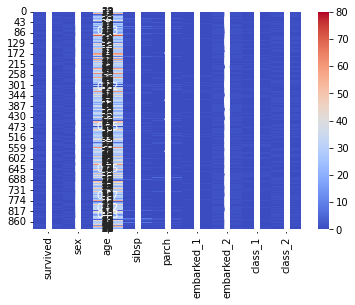

In [43]:
sns.heatmap(df,annot = True,cmap = 'coolwarm' )

<AxesSubplot:>

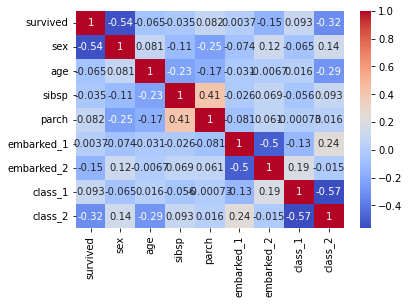

In [44]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm' )

In [45]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',
       'class_1', 'class_2'],
      dtype='object')

## Data_split

In [46]:
# split the data into dependent and independent variables
# x is independent and y is dependent variable
x = df[['sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',
       'class_1', 'class_2']]

In [47]:
x.head()

,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,1,0,0
4,1,35.0,0,0,0,1,0,1


In [48]:
 y = df[['survived']]

In [49]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [50]:
# split the data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.75,random_state = 10)

In [51]:
print(x_train.shape)
print('******')
print(x_test.shape)
print('******')
print(y_train.shape)
print('******')
print(y_test.shape)
print('******')

(668, 8)
******
(223, 8)
******
(668, 1)
******
(223, 1)
******


# Building Logistic_Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred_test = logit_model.predict(x_test)

In [54]:
y_pred_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [55]:
y_test.values.transpose()

array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1]], dtype=int64)

In [56]:
# from the above predict values and actual test values, there are some mismatch or wrong prediction. 
# To find that, we use confusion matrix and calculate model accuracy

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
print(confusion_matrix(y_test,y_pred_test))

[[131  16]
 [ 22  54]]


In [59]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       147
           1       0.77      0.71      0.74        76

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [60]:
131/(131+16)

0.891156462585034

In [61]:
131/(131+22)

0.8562091503267973

In [62]:
print(accuracy_score(y_test,y_pred_test))

0.8295964125560538


In [63]:
# accuracy is given by ratio of (TN+TP) to (TN+FN+FP+TP)

(131+54)/(131+16+22+54)

0.8295964125560538

In [64]:
# test result accuracy is 82%
# Now calculate train model accuracy

In [65]:
y_pred_train = logit_model.predict(x_train)

In [66]:
y_pred_train

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [67]:
y_train.values.transpose()

array([[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

In [68]:
print(accuracy_score(y_train,y_pred_train))

0.8068862275449101


In [69]:
# test result accuracy is 82%
#  train model accuracy is 80%

In [70]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.10884354, 1.        ])

array([0.        , 0.71052632, 1.        ])

array([2, 1, 0], dtype=int64)

## Plotting ROC & AUC Curve

In [71]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test,y_pred_test)
logit_roc_auc 

0.8008413891872539

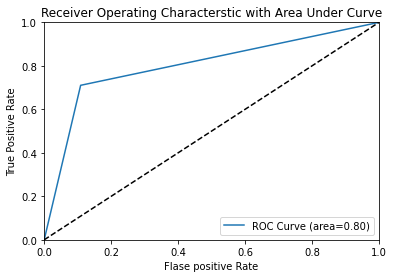

In [72]:
plt.figure()
plt.plot(fpr,tpr,label= 'ROC Curve (area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Flase positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc= 'lower right')
plt.show()

## k-Fold Method(Cross_Validation)

In [73]:
# To increase train,test model accuracy, use the cross_validation method and other methods are there Like GridSearchCV,RandomCV

In [74]:
from sklearn.model_selection import cross_val_score
acc_train = cross_val_score(logit_model,x_train,y_train,cv=15)
acc_test = cross_val_score(logit_model,x_test,y_test,cv=15)
print(acc_train)
print('*********'*5)
print(acc_test)

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.73333333 0.8        0.77777778 0.93333333 0.77777778 0.75555556
 0.75555556 0.8        0.72727273 0.75       0.88636364 0.75
 0.84090909 0.84090909 0.84090909]
*********************************************
[0.93333333 0.93333333 0.6        0.93333333 0.73333333 0.86666667
 0.93333333 0.86666667 0.86666667 0.8        0.8        0.66666667
 0.93333333 0.78571429 0.64285714]


C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dasar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [75]:
print('Training data accuracy: ',acc_train[3])
print('*********'*5)
print('Testing data accuracy',acc_test[1])

Training data accuracy:  0.9333333333333333
*********************************************
Testing data accuracy 0.9333333333333333


In [76]:
#test_data = pd.read_csv('test (1).csv')
#test_data.head()

In [77]:
'''
sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',
       'class_1', 'class_2'
'''

"\nsex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',\n       'class_1', 'class_2'\n"

In [78]:
#test_data.columns

In [79]:
#td= test_data[['Sex','Age','SibSp', 'Parch','Pclass','Embarked']]

In [80]:
#td.head()

In [81]:
#td.isnull().sum()

In [82]:
#td['Age'] = td['Age'].fillna(td['Age'].median())

In [83]:
#td.isnull().sum()

In [84]:
#td['Sex'] = td['Sex'].astype('category')
#td['Sex'] =td['Sex'].cat.codes
#td['Sex'] =pd.get_dummies(td,columns= ['Sex'])

In [85]:
#td.head()

In [86]:
#td['Pclass']=td['Pclass'].astype('category')
#td['Pclass'] = td['Pclass'].cat.codes
#td= pd.get_dummies(td,columns= ['Pclass'])
#td.head()

In [87]:
#td = td.drop(['Pclass_0'],axis=1)

In [88]:
#td['Embarked'] =td['Embarked'].astype('category')
#td['Embarked'] = td['Embarked'].cat.codes
#td = pd.get_dummies(td,columns = ['Embarked'])
#td.head()

In [89]:
#td = td.drop(['Embarked_0'],axis=1)
#td.head()

In [90]:
#print(df.head(2))
#print('*********')
#print(td.head(2))

In [91]:
#td= td[['Sex','Age','SibSp','Parch','Embarked_1','Embarked_2','Pclass_1','Pclass_2']]
#td.head()

In [92]:
#df.head()

In [93]:
#column_name = [['sex','age','sibsp','parch','embarked_1','embarked_2','class_1','class_2']]

In [94]:
#td.columns = column_name

In [95]:
#print(df.head(2))
#print('*********')
#print(td.head(2))

In [96]:
# Data preprocessing is completed

# predict the dependent variable of test_dataset using Logisit Regression

In [97]:
#td_pred = logit_model.predict(td)

In [98]:
#td_pred

In [99]:
#new_file = pd.concat([td,pd.DataFrame(td_pred)],axis=1)

In [100]:
#new_file.head()

In [101]:
#N_column_name = [['sex','age','sibsp','parch','embarked_1','embarked_2','class_1','class_2','survived']]

In [102]:
#new_file.columns = N_column_name

In [103]:
#new_file.head()

In [104]:
#test_data1 = pd.read_csv('test (1).csv')
#test_data1.head()

In [105]:
#test_data1.columns

In [106]:
#res_file = pd.concat([test_data1,pd.DataFrame(td_pred)],axis =1)
#res_file.head()

In [107]:
#col_name = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked','Survived']

In [108]:
#res_file.columns =col_name

In [109]:
#res_file.head()

In [110]:
#res_file.to_csv('Log_Reg_Predicted_titanic_test.csv')

# Building Decision_Tree with Classification Problem Model

In [125]:
from sklearn.tree import DecisionTreeClassifier
dct1 = DecisionTreeClassifier(criterion='gini')
dct2 = DecisionTreeClassifier(criterion='entropy')
dct1.fit(x_train,y_train)
dct2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [126]:
y_pred_dct1_test = dct1.predict(x_test)
y_pred_dct2_test = dct2.predict(x_test)

In [127]:
y_pred_dct1_train = dct1.predict(x_train)
y_pred_dct2_train = dct2.predict(x_train)

In [128]:
print(accuracy_score(y_train,y_pred_dct1_train))
print(accuracy_score(y_test,y_pred_dct1_test))

0.9341317365269461
0.8340807174887892


In [129]:
print(accuracy_score(y_train,y_pred_dct2_train))
print(accuracy_score(y_test,y_pred_dct2_test))

0.9341317365269461
0.8295964125560538


In [ ]:
# LOGISTIC
# test result accuracy is 82%
#  train model accuracy is 80%

# DECISION TREE
# test result accuracy is 93%
#  train model accuracy is 83%
# difference between train and test accuracy is more. So High variances (Over_fitting)


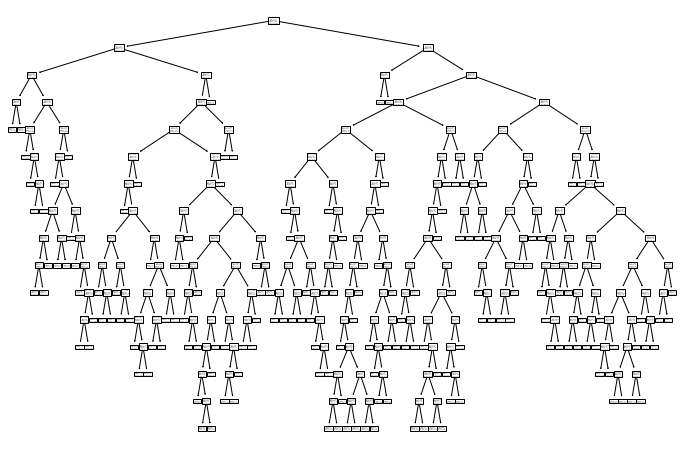

In [130]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dct1)
plt.show()

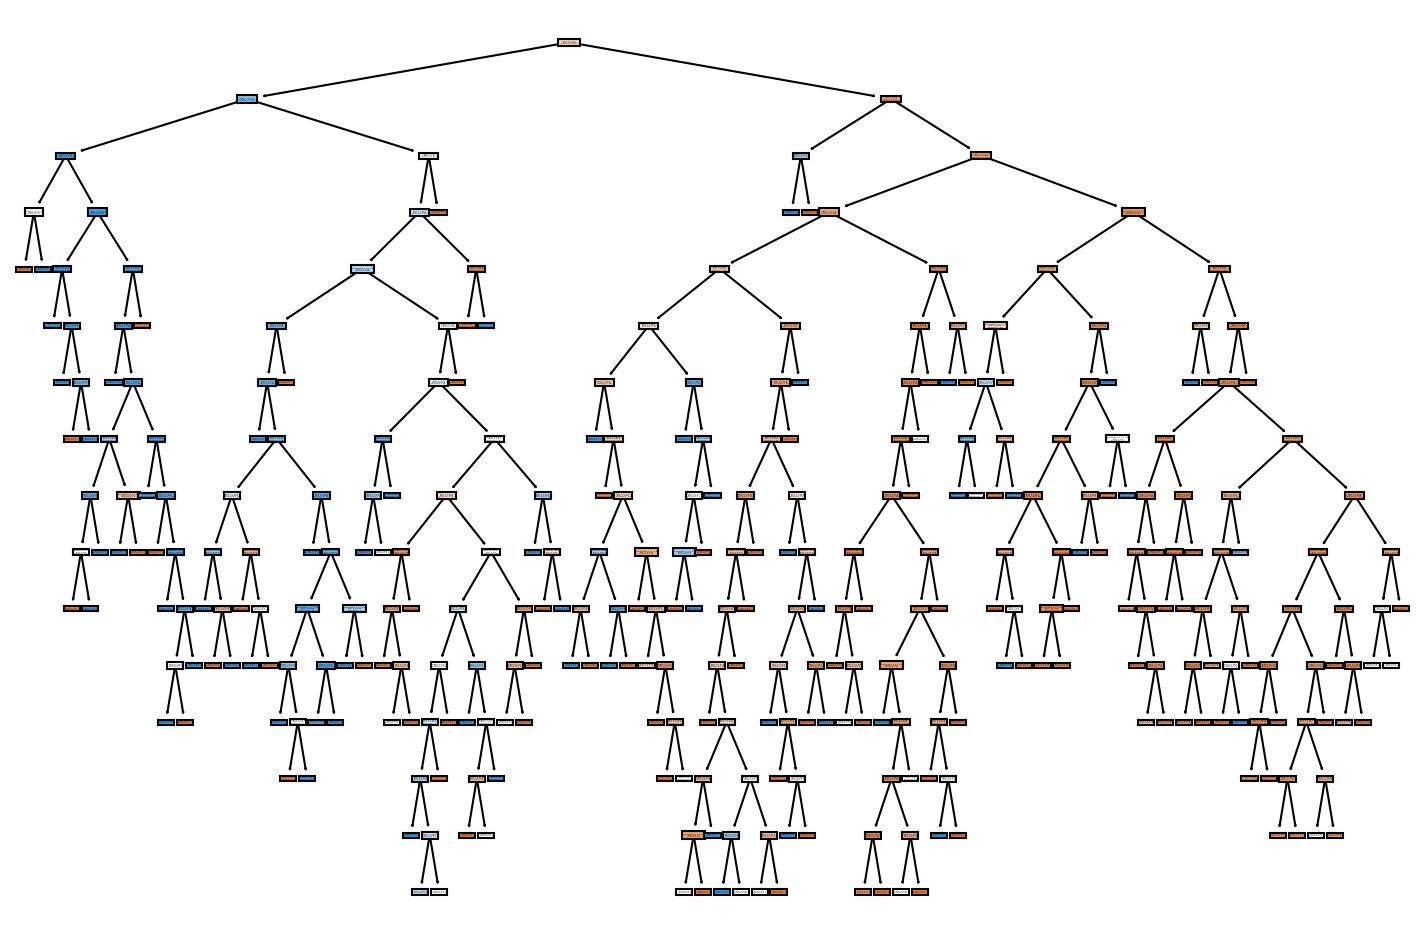

In [131]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dct1,feature_names=x.columns,filled =True)
plt.show()